In [119]:
"""
Compute and plot the leading EOF of sea surface temperature in the
central and northern Pacific during winter time.

The spatial pattern of this EOF is the canonical El Nino pattern, and
the associated time series shows large peaks and troughs for well-known
El Nino and La Nina events.

This example uses the plain numpy interface.

Additional requirements for this example:

    * netCDF4 (http://unidata.github.io/netcdf4-python/)
    * matplotlib (http://matplotlib.org/)
    * cartopy (http://scitools.org.uk/cartopy/)

"""

import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

from eofs.standard import Eof
from eofs.examples import example_data_path



In [2]:

# Read SST anomalies using the netCDF4 module. The file contains
# November-March averages of SST anomaly in the central and northern Pacific.
filename = example_data_path('sst_ndjfm_anom.nc')
ncin = Dataset(filename, 'r')
sst = ncin.variables['sst'][:]
lons = ncin.variables['longitude'][:]
lats = ncin.variables['latitude'][:]
ncin.close()

In [8]:
lats.shape

(18,)

In [7]:
lons.shape

(30,)

In [6]:
sst.shape

(50, 18, 30)

In [9]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(lats))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)


/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_12649/2085431698.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver = Eof(sst, weights=wgts)


In [10]:

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)


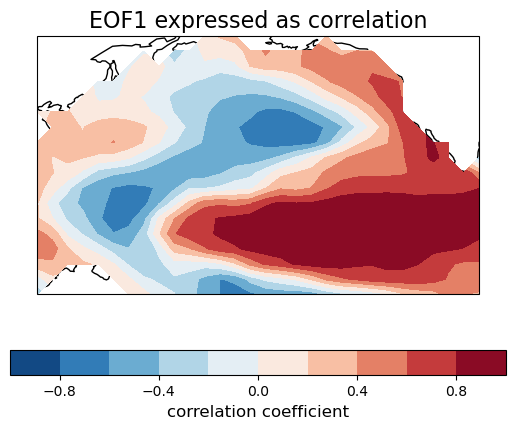

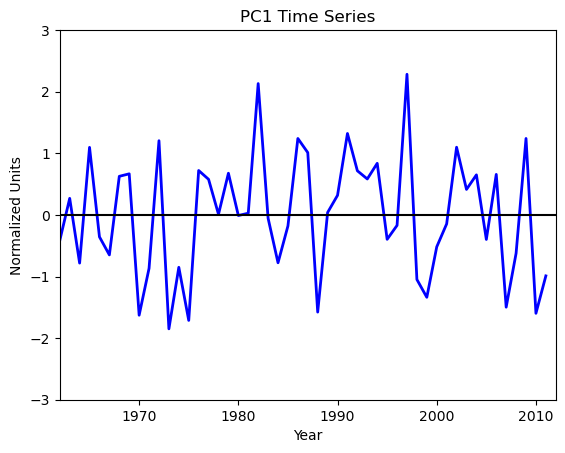

In [11]:

# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = ax.contourf(lons, lats, eof1.squeeze(), clevs,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
plt.title('EOF1 expressed as correlation', fontsize=16)

# Plot the leading PC time series.
plt.figure()
years = range(1962, 2012)
plt.plot(years, pc1, color='b', linewidth=2)
plt.axhline(0, color='k')
plt.title('PC1 Time Series')
plt.xlabel('Year')
plt.ylabel('Normalized Units')
plt.xlim(1962, 2012)
plt.ylim(-3, 3)

plt.show()

In [ ]:
help(Eof)

In [18]:
from datetime import datetime, timedelta

import pandas as pd

import sys

# path to own functions
sys.path.append('../../')
import data_UniBremen.SIC as UNISIC

In [164]:
date = datetime(2020, 3, 15)
# SIC
data = UNISIC.open_remote_file(date, res = '6250', hem = 'n', method = 'urllib',
                               area = False, include_units=False)

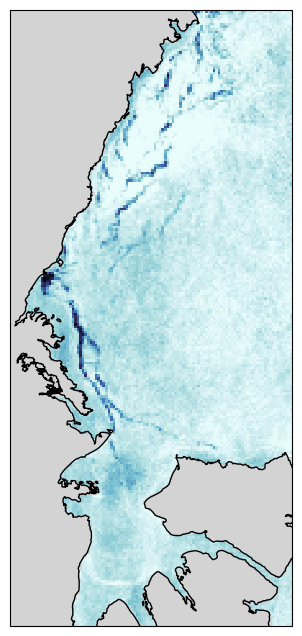

In [184]:
%matplotlib inline
# create figure
#--------------
fig, ax = plt.subplots(subplot_kw=dict(projection=data['proj']), figsize=(8,8))
ax.set_facecolor('lightgray')
ax.coastlines()

ai, aj = 740, 980
bi, bj = 240, 350
ax.pcolormesh(data['xx'][ai:aj, bi:bj], data['yy'][ai:aj, bi:bj], data['sic'][ai:aj, bi:bj], 
              vmin=0, vmax = 100, cmap=cmocean.cm.ice)


In [243]:
dates = pd.date_range(datetime(2016,12,15), datetime(2017,3,15) )

In [244]:
all_sic = np.array([])

for date in dates:
    # SIC
    data = UNISIC.open_remote_file(date, res = '6250', hem = 'n', method = 'urllib',
                                   area = False, include_units=False)

    total_size = np.shape(data['sic'][ai:aj, bi:bj])[0]*np.shape(data['sic'][ai:aj, bi:bj])[1]
    if np.sum(np.isnan(data['sic'][ai:aj, bi:bj]))/total_size < 0.5:
        all_sic = np.append(all_sic, data['sic'][ai:aj, bi:bj])
        
    else:
        print(f'missing data: {date}')
    
# reshape to stacked data
dim1 = data['sic'][ai:aj, bi:bj].shape[0]
dim2 = data['sic'][ai:aj, bi:bj].shape[1]
dim0 = int(all_sic.shape[0]/(dim1*dim2))
sic_stack = np.reshape(all_sic, (dim0, dim1, dim2))

sic_mean = np.nanmean(sic_stack, axis=0)
sic_anomaly = sic_stack - sic_mean

/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_12649/1925611423.py:21: RuntimeWarning: Mean of empty slice
  sic_mean = np.nanmean(sic_stack, axis=0)


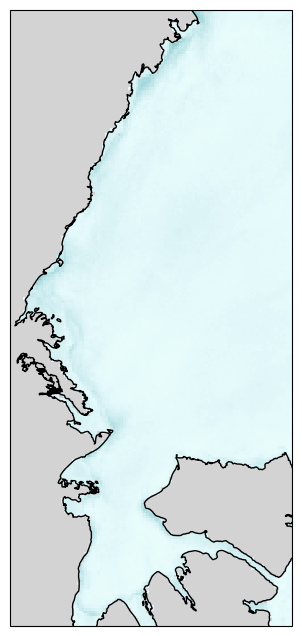

In [245]:
%matplotlib inline
# create figure
#--------------
fig, ax = plt.subplots(subplot_kw=dict(projection=data['proj']), figsize=(8,8))
ax.set_facecolor('lightgray')
ax.coastlines()

ax.pcolormesh(data['xx'][ai:aj, bi:bj], data['yy'][ai:aj, bi:bj], sic_mean, 
              vmin=0, vmax = 100, cmap=cmocean.cm.ice)


In [246]:
solver = Eof(sic_stack)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.

num_eof = 5

eofs = solver.eofsAsCorrelation(neofs=num_eof)
# eofs = solver.eofsAsCovariance(neofs=num_eof)
pcs = solver.pcs(npcs=num_eof, pcscaling=0)
varfrac = solver.varianceFraction()
lambdas = solver.eigenvalues()


/var/folders/p8/hz449fpx6nscv0jb1klyfqb40000gp/T/ipykernel_12649/3994303173.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver = Eof(sic_stack)


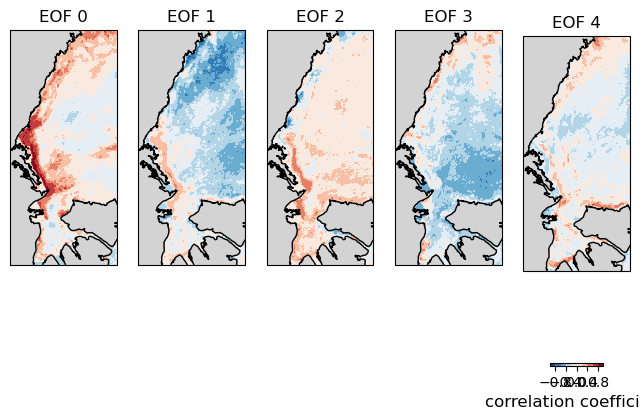

In [247]:
%matplotlib inline
# create figure
#--------------
fig, axs = plt.subplots(1, num_eof, subplot_kw=dict(projection=data['proj']), figsize=(8,8))

for num, ax in zip(range(num_eof), axs):
    ax.set_facecolor('lightgray')
    ax.coastlines()

    fill = ax.contourf(data['xx'][ai:aj, bi:bj], 
                       data['yy'][ai:aj, bi:bj], eofs[num,:,:].squeeze(), 
                       clevs, cmap=plt.cm.RdBu_r)
    ax.set_title(f'EOF {num}')
#     ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal', shrink=0.5)
cb.set_label('correlation coefficient', fontsize=12)
# plt.title('EOF1 expressed as correlation', fontsize=16)



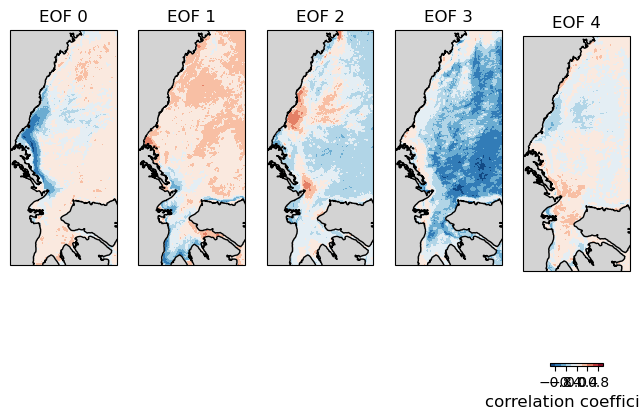

In [241]:
%matplotlib inline
# create figure
#--------------
fig, axs = plt.subplots(1, num_eof, subplot_kw=dict(projection=data['proj']), figsize=(8,8))

for num, ax in zip(range(num_eof), axs):
    ax.set_facecolor('lightgray')
    ax.coastlines()

    fill = ax.contourf(data['xx'][ai:aj, bi:bj], 
                       data['yy'][ai:aj, bi:bj], eofs[num,:,:].squeeze(), 
                       clevs, cmap=plt.cm.RdBu_r)
    ax.set_title(f'EOF {num}')
#     ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal', shrink=0.5)
cb.set_label('correlation coefficient', fontsize=12)
# plt.title('EOF1 expressed as correlation', fontsize=16)



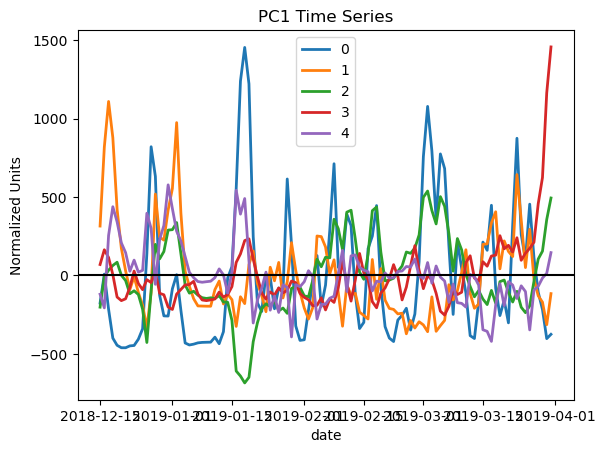

In [242]:
# Plot the leading PC time series.
plt.figure()

for num in range(num_eof):
    plt.plot(dates[:-1], pcs[:,num], label=num, linewidth=2)
plt.axhline(0, color='k')
plt.title('PC1 Time Series')
plt.xlabel('date')
plt.ylabel('Normalized Units')
plt.legend()
# plt.ylim(-3, 3)

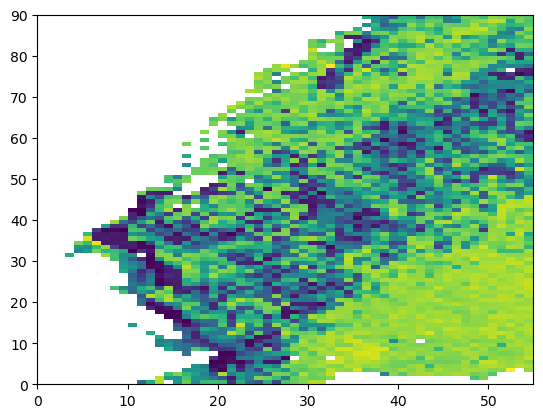

In [108]:
plt.pcolormesh(eof1.squeeze())

In [105]:
data['xx'][ai:aj, bi:bj][::2,::2]

array([[-2346875., -2334375., -2321875., ..., -1696875., -1684375.,
        -1671875.],
       [-2346875., -2334375., -2321875., ..., -1696875., -1684375.,
        -1671875.],
       [-2346875., -2334375., -2321875., ..., -1696875., -1684375.,
        -1671875.],
       ...,
       [-2346875., -2334375., -2321875., ..., -1696875., -1684375.,
        -1671875.],
       [-2346875., -2334375., -2321875., ..., -1696875., -1684375.,
        -1671875.],
       [-2346875., -2334375., -2321875., ..., -1696875., -1684375.,
        -1671875.]])

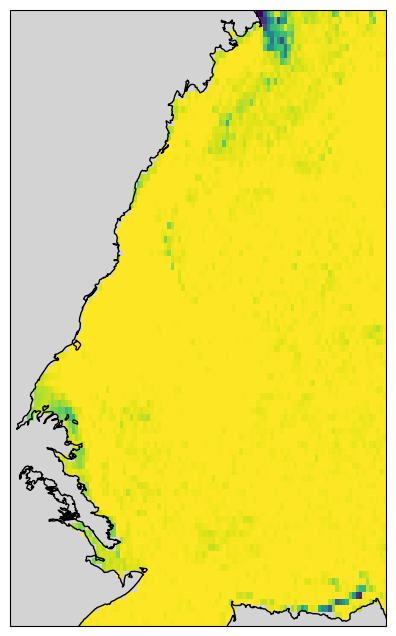

In [94]:
%matplotlib inline
# create figure
#--------------
fig, ax = plt.subplots(subplot_kw=dict(projection=data['proj']), figsize=(8,8))
ax.set_facecolor('lightgray')
ax.coastlines()

ai, aj = 800, 980
bi, bj = 240, 350
ax.pcolormesh(data['xx'][ai:aj, bi:bj][::2], data['yy'][ai:aj, bi:bj][::2], data['sic'][ai:aj, bi:bj][::2])

In [63]:
data['xx'][ai:aj, bi:bj].shape

(180, 110)

In [91]:
180*110

19800